<a href="https://colab.research.google.com/github/LCaravaggio/politext/blob/main/GS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar la base

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
base=pd.read_csv('/content/drive/MyDrive/base_formateada.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# Se incorporan las stopwords sugeridas por Federico
stopwords.extend(['señor', 'señora', 'mucha', 'gracia', 'año', 'pasado', 'cada', 'vez', 'uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis' ,'siete', 'ocho', 'nueve', 'diez'])
stopwords.extend(['hoy', 'aquí', 'primer', 'lugar', 'primera', 'segunda', 'primero', 'segundo', 'siguiente', 'tercer'])
stopwords.extend(['convergencia', 'esquerra', 'republicana', 'grupo', 'parlamentaria', 'parlamentario', 'partido'])
stopwords.extend(['enmienda', 'votación', 'favor', 'abstención', 'ley', 'real', 'decreto', 'decretoley', 'resultado', 'voto', 'sé' ,'sí', 'silencio' ,'favor'])
stopwords.extend(['usted', 'señoría', 'presidente', 'presidenta', 'ministro', 'orden' , 'día', 'palabra', 'petición', 'posición', 'punto', 'vista', 'sesión', 'baldoví', 'duran', 'turno'])
stopwords.extend(['hacer', 'frente', 'puede' ,'ser', 'va', 'voy', 'decir'])
stopwords.extend(['millón', 'euro', 'emitido', 'efectuada', 'dio', 'comienzo', 'partido', 'queda', 'quedan', 'rechazada', 'aceptada', 'comienza', 'usted', 'sabe', 'abstención', 'diputado', 'gobierno'])
stopwords.extend(['continuación', 'votamos', 'telemático', 'republicanaizquierda', 'unidainiciativa', 'puede', 'bien', 'propuesta' ,'abstencion', 'mayoría', 'absoluta', 'pregunta', 'don', 'vamos', 'votar', 'llevar', 'cabo', 'millón', 'muchas', 'gracias'])
stopwords.extend(['podemosen', 'podemen', 'ministro', 'ministra', 'ss', 'ruego', 'aprobado', 'aprobada'])
stopwords.extend(['diputado', 'diputada', 'don', 'doña', 'vicepresidenta', 'sagastizab', 'unzetabarrenetxea', 'agirretxea', 'urresti', 'escrutinio', 'dijo', 'dice', 'quevedo'])
stopwords.extend(['campuzano', 'beitialarrangoitia', 'gonzalezmoro', 'mixto'])

In [5]:
# Se incorporan los nombres de los oradores como stopwords
from collections import Counter
nombres=[]
for i in base.namey.unique().tolist(): nombres.extend(str(i).split(' '))
nombres = [x.strip(' ') for x in nombres]
nombres = [x.strip(' †') for x in nombres]
nombres = [x.strip(',') for x in nombres]
nombres=list(Counter(nombres))
nombres.remove('')

In [6]:
stopwords.extend(nombres)

In [7]:
partidos=pd.read_csv('/content/drive/MyDrive/partidos.csv', encoding='latin1', sep=';')

In [8]:
for x in partidos['nombre'].unique(): 
  a=str(x).rstrip(' ')
  stopwords.extend(str(a).split())
  stopwords.extend(a)

for x in partidos['1'].unique():
  a=str(x).rstrip(' ')
  stopwords.extend(a.split())
  stopwords.extend(a)

for x in partidos['2'].unique(): 
  a=str(x).rstrip(' ')
  stopwords.extend(a.split())
  stopwords.extend(a)

for x in partidos['3'].unique(): 
  a=str(x).rstrip(' ')
  stopwords.extend(a.split())
  stopwords.extend(a)

In [9]:
len(stopwords)

4481

In [10]:
# elimino acentos de los tokens
a,b = 'áàéèíóúü','aaeeiouu'
trans = str.maketrans(a,b)
list = []
for row in base.values:
    row[20]=row[20].translate(trans)
    list.append(row)

base = pd.DataFrame(list, columns=base.columns)

In [11]:
# llevo las stopwords a minúsculas y elimino acentos
stopwords=[x.lower() for x in stopwords if type(x)==str]
stopwords=[x.translate(trans) for x in stopwords if type(x)==str]

# Mencionadas en al menos 10 discursos
(spoken in at least 10 unique speaker-session)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=[2,2], stop_words=stopwords , min_df=10)
bow = vect.fit_transform(base['tokens'])

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ahuja', 'alcañiz', 'amor', 'arreciado', 'barcena', 'barnuevo', 'capel', 'capitan', 'cascos', 'castejon', 'cienfuegos', 'compromis', 'congr', 'escandon', 'estefani', 'figueroa', 'fortun', 'hickman', 'huarte', 'jeltzalea', 'jovellanos', 'lasquetty', 'latorre', 'legaz', 'lersundi', 'llin', 'machuca', 'maillo', 'mancisidor', 'margallo', 'maribona', 'marlaska', 'medel', 'menchero', 'mendicoa', 'na', 'olivares', 'patxi', 'peces', 'pedrero', 'pinilla', 'piñero', 'ponga', 'pujalte', 'salmones', 'santesmases', 'sito', 'soro', 'sotelo', 'tagle', 'tesorero', 'tizon', 'toledano', 'torrecilla', 'trevijano', 'valdecasas', 'valdes', 'vargas', 'villaseñor', 'ximo', 'yañez'] not in stop_words.
  warnings.warn(


In [13]:
total_features = len(vect.vocabulary_)

# Mencionadas al menos 100 veces en total
(spoken at least 100 times across al sessions)

In [14]:
new_voc={}
for token in vect.vocabulary_: 
  if vect.vocabulary_[token]>100:
    new_voc[token]=vect.vocabulary_[token]

In [15]:
len(new_voc)

270231

# Mencionadas al menos 10 veces en un día
(spoken at least 10 times in at least one session)

In [16]:
# Gentzkow et.al. usan mencionadas al menos 10 veces en una "sesión". Acá se usa mencionadas al menos 10 veces en un "día". 

new_voc2={}
vect = CountVectorizer(ngram_range=[2,2], stop_words=stopwords)
for x in base.fecha.unique(): 
  base_dia=base[pd.DatetimeIndex(base.fecha)==x]
  try: 
    bow = vect.fit_transform(base_dia['tokens'])
    for token in vect.vocabulary_: 
      if vect.vocabulary_[token]>10:
        new_voc2[token]=vect.vocabulary_[token]
  except: pass

In [17]:
len(new_voc2)

7719234

# Combinación

In [18]:
inter=set(new_voc2).intersection(new_voc)

In [19]:
vect = CountVectorizer(ngram_range=[2,2], stop_words=stopwords ,vocabulary=inter)
bow = vect.fit_transform(base['tokens'])
total_features = len(vect.vocabulary_)

In [20]:
# La intersección genera un vocabulario de apenas 814 bigramas. 
total_features

270230

In [21]:
matrix = bow

# LDA con 10 clusters

In [22]:
# Acá hay un problema porque se sigue usando 10 clusters cuando en realidad habría que chequear el número óptimo de clusters una vez definida la cantidad de bigramas a utilizar. 
# Sin embargo, Text as data dice que el número de clústers es generalmente arbitrario, y recomienda arrancar probando con 10. 
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, max_iter=15, learning_method='batch', learning_offset=50.,random_state=0)     

In [23]:
lda.fit(matrix)

LatentDirichletAllocation(learning_offset=50.0, max_iter=15, random_state=0)

In [24]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx + 1))
        print(" , ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [25]:
display_topics(lda, feature_names=vect.get_feature_names_out(), no_top_words=20)

Topic 1:
guardia civil , comision investigacion , medio comunicacion , cuerpo seguridad , ministerio interior , fuerza cuerpo , asunto exterior , responsabilidad politica , ministerio asunto , fuerza seguridad , seguridad vial , policia guardia , opinion publica , cualquier caso , policia nacion , ministerio cultura , cuerpo nacion , nacion policia , relacion cort , proteccion civil
Topic 2:
comunidad autonoma , tribun constitucion , articulo constitucion , codigo penal , estatuto autonomia , disposicion adicion , exposicion motivo , ordenamiento juridico , corporacion local , toma consideracion , sentencia tribun , administracion publica , cort general , poder publico , hace referencia , texto alternativo , seguridad juridica , consideracion proposicion , disposicion transitoria , competencia comunidad
Topic 3:
poder judici , administracion publica , consejo poder , funcion publica , fuerza armada , administracion justicia , sistema nacion , nacion salud , comunidad autonoma , formaci

# LASSO por legislatura

In [ ]:
from tabulate import tabulate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
from numpy import argsort
import statistics
from statistics import mode
from scipy.special import logsumexp
import scipy as sp

In [ ]:
def frex(mod, w=0.7):
    log_beta = np.log(mod.components_)
    log_exclusivity = log_beta - logsumexp(log_beta, axis=0)
    exclusivity_ecdf = np.apply_along_axis(ecdf, 1, log_exclusivity)
    freq_ecdf = np.apply_along_axis(ecdf, 1, log_beta)
    out = 1. / (w / exclusivity_ecdf + (1 - w) / freq_ecdf)
    return out

def ecdf(arr):
    return sp.stats.rankdata(arr, method='max') / arr.size

In [ ]:
frex_df=pd.DataFrame(frex(lda))

In [ ]:
# Topic que presenta mayor FREX para cada bigrama
d = []
feature_names=vect.get_feature_names_out()
for n in enumerate(feature_names):
    d.append(
        {
            'N': n[0],
            'Bigrama': n[1],
            'Topic':  frex_df[n[0]].argsort()[9]
        }
    )

bi_topic_frex=pd.DataFrame(d)
bi_topic_frex.head(20)

,N,Bigrama,Topic
0,0,abierto competitivo,9
1,1,abierto comunidad,1
2,2,abierto consenso,0
3,3,abierto considerar,6
4,4,abierto cualquier,2
5,5,abierto debat,8
6,6,abierto dialogar,0
7,7,abierto dialogo,9
8,8,abierto dicho,0
9,9,abierto discusion,9


In [ ]:
# Relevancia de bigramas en la predicción por legislatura
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

tabla=[]
legislaturas=['I', 'II', 'III', 'IV', 'V', 'VI', 'VII','VIII', 'IX', 'X', 'XI', 'XII','XIII']
n=5

macro=[]
weighted=[]

lr = LogisticRegression(penalty='l1', max_iter=50, solver='liblinear')
cv=CountVectorizer(ngram_range=[2,2], stop_words=stopwords ,vocabulary=inter)

for x in legislaturas: 
  try: 
    base_year=base[base.legislatura==x]
    X_train, X_test, y_train, y_test = train_test_split(base_year.loc[:, base_year.columns != 'party'], base_year['party'], test_size=0.33, random_state=42)
    train_matrix = vect.fit_transform(X_train['tokens'])
    test_matrix = vect.transform(X_test['tokens'])  
    lr.fit(train_matrix,y_train)
    predictions = lr.predict(test_matrix )
    macro.append(f1_score(predictions,y_test, average='macro'))
    weighted.append(f1_score(predictions,y_test, average='weighted'))
    s=lr.coef_[0]
    print(f"Legislatura: {x} - Most Frecuent Topic: {mode(bi_topic_frex['Topic'][argsort(s)])}")
    print(tabulate([cv.get_feature_names_out()[argsort(s)[:n]], sorted(s)[:n],bi_topic_frex['Topic'][argsort(s)[:n]],cv.get_feature_names_out()[argsort(s)[-n:]], sorted(s)[-n:],  bi_topic_frex['Topic'][argsort(s)[-n:]]], tablefmt='pretty'))
  except: 
    macro.append(np.nan)
    weighted.append(np.nan)    

Legislatura: I - Most Frecuent Topic: 8
+--------------------+--------------------+---------------------+---------------------+--------------------+
|  nombr centrista   |    duda ninguna    | articulo mantenida  |  libertad libertad  |   articulo pausa   |
| -3.549276404572062 | -3.527940415756376 | -2.8903444535964598 | -2.8042904769329446 | -2.649982807935666 |
|         1          |         7          |          4          |          0          |         4          |
| formacion politica |   cualquier caso   | solucionar problema |    reunion junta    |   pasamo examen    |
| 2.173631617023642  | 2.1872960026471904 | 2.2613183146291282  |  2.570740837867983  | 2.7548127978897994 |
|         8          |         5          |          7          |          4          |         6          |
+--------------------+--------------------+---------------------+---------------------+--------------------+
Legislatura: II - Most Frecuent Topic: 8
+---------------------+--------------------+---

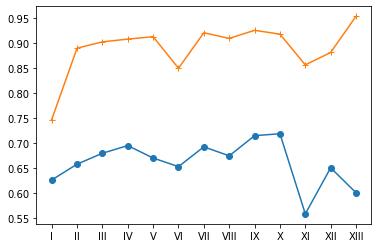

In [ ]:
# Yo entiendo que el resultado relevante es el macro, porque considera el desbalance de clases
import matplotlib.pyplot as plt
plt.plot(legislaturas, macro, marker='o')
plt.plot(legislaturas, weighted, marker='+')

# LASSO por año

In [ ]:
# Relevancia de bigramas en la predicción por año
macro=[]
weighted=[]
tabla=[]

nombres=cv.get_feature_names_out()
componentes=lda.components_.transpose()
n = 5
lr = LogisticRegression(penalty='l1', max_iter=1000, solver='liblinear')

for x in range (1979, 2020): 
  try: 
    base_year=base[pd.DatetimeIndex(base.fecha).year==x]
    X_train, X_test, y_train, y_test = train_test_split(base_year.loc[:, base_year.columns != 'party'], base_year['party'], test_size=0.33, random_state=42)
    train_matrix = vect.fit_transform(X_train['tokens'])
    test_matrix = vect.transform(X_test['tokens'])  
    lr.fit(train_matrix,y_train)
    predictions = lr.predict(test_matrix )
    macro.append(f1_score(predictions,y_test, average='macro'))
    weighted.append(f1_score(predictions,y_test, average='weighted'))
    s = lr.coef_[0]
    print(f"Año: {x}")
    print(tabulate([cv.get_feature_names_out()[argsort(s)[:n]], sorted(s)[:n],bi_topic_frex['Topic'][argsort(s)[:n]],cv.get_feature_names_out()[argsort(s)[-n:]], sorted(s)[-n:],  bi_topic_frex['Topic'][argsort(s)[-n:]]], tablefmt='pretty'))
  except: 
    macro.append(np.nan)
    weighted.append(np.nan)  

Año: 1979
+----------------------+---------------------+---------------------+---------------------+---------------------+
|  publicada boletin   |  correspond ahora   |     misma razon     |      quier uso      | ultima intervencion |
| -2.5222317804060768  | -2.4847429484345174 | -1.9272200015116672 | -1.7392107850094534 | -1.7297614129418764 |
|          0           |          2          |          2          |          4          |          9          |
| ministerio educacion |  orador precedido   |     ningun tipo     | ministerio hacienda | formacion politica  |
|  0.9633499478985179  | 1.0045817961668109  | 1.0456324338784133  |  1.190383393445428  | 1.9685748153989335  |
|          6           |          5          |          7          |          5          |          8          |
+----------------------+---------------------+---------------------+---------------------+---------------------+
Año: 1980
+---------------------+----------------------+---------------------+--------

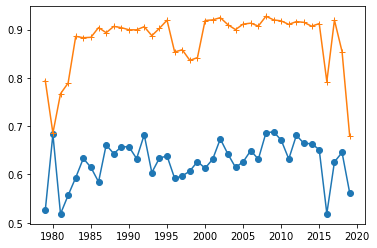

In [ ]:
# Yo entiendo que el resultado relevante es el macro, porque considera el desbalance de clases
import matplotlib.pyplot as plt
plt.plot(range(1979,2020), macro, marker='o')
plt.plot(range(1979,2020), weighted, marker='+')

# LASSO overall

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(base.loc[:, base_year.columns != 'party'], base['party'], test_size=0.33, random_state=42)
train_matrix = vect.fit_transform(X_train['tokens'])
test_matrix = vect.transform(X_test['tokens'])  
lr.fit(train_matrix,y_train)
predictions = lr.predict(test_matrix )
print(f1_score(predictions,y_test, average='macro'))
print(f1_score(predictions,y_test, average='weighted'))
s = lr.coef_[0]
print(tabulate([cv.get_feature_names_out()[argsort(s)[:n]], sorted(s)[:n],bi_topic_frex['Topic'][argsort(s)[:n]],cv.get_feature_names_out()[argsort(s)[-n:]], sorted(s)[-n:],  bi_topic_frex['Topic'][argsort(s)[-n:]]], tablefmt='pretty'))

0.6475676345836355
0.702092524952785
+--------------------+--------------------+--------------------+--------------------+--------------------+
|  dirigida conform  |  termino derivado  |  pausa procedemo   |   numero formula   |  referido senado   |
| -4.563631313666959 | -4.495666259901117 | -4.467462000867042 | -4.313279503955554 | -4.286990885912989 |
|         4          |         4          |         4          |         1          |         4          |
|   seccion pausa    |    fijar pausa     |  turismo comercio  |      cd pausa      |  confeder podemo   |
| 4.337243334545795  | 4.5238540101213145 | 4.564449330704396  | 4.824248859413627  | 4.919934962942936  |
|         4          |         2          |         5          |         4          |         6          |
+--------------------+--------------------+--------------------+--------------------+--------------------+


# Topic por discurso por weight

In [26]:
base.shape

(334421, 21)

In [27]:
matrix

<334421x270230 sparse matrix of type '<class 'numpy.int64'>'
	with 8479733 stored elements in Compressed Sparse Row format>

In [28]:
lda.components_.shape

(10, 270230)

In [29]:
disc_weights=matrix*lda.components_.transpose()

In [30]:
pd.DataFrame(disc_weights)

,0,1,2,3,4,5,6,7,8,9
0,1.895022,368.874840,0.487960,0.200016,0.200010,11.369097,3.555456,0.200010,1528.244460,316.973128
1,48.679894,402.748750,161.535735,151.586220,29.820095,58.953386,125.348155,37.960878,666.418114,87.948774
2,189.567273,222.219997,229.095032,93.709399,101.085256,63.462675,63.203865,65.799454,174.314675,415.542375
3,145.552557,209.336918,35.446370,4.365061,6.781903,6.896645,7.700900,5.291612,348.794869,356.833165
4,269.295148,298.227450,9.880958,46.773718,13.114930,11.846984,32.578132,9.382510,7.845158,622.055012
...,...,...,...,...,...,...,...,...,...,...
334416,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
334417,5.129920,227.471353,439.997185,94.495560,1129.851431,124.734862,740.184879,152.498171,667.264145,22.372492
334418,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
334419,553.477176,533.216657,242.676982,78.008213,172.692365,50.404432,97.743083,1141.963825,863.645468,481.171799


In [31]:
base['Topic_weight']=disc_weights.argmax(axis=1)

In [32]:
base.head()

,Unnamed: 0,orden,namex,intervention,fecha,legislatura,pleno,role,oradorx,namey,...,congreso,senado,total,oradory,cataluna,estatut,inter_raw,partido,tokens,Topic_weight
0,0,"LECTURA DEL REAL DECRETO. DE CONVOCATORIA, DE ...",PRESIDENTE PROVISIONAL (Fraile Poujade),"Señoras y señores Diputados, se abre la sesió...",23/03/1979,I,1.0,PRESIDENTE PROVISIONAL,FRAILE POUJADE,"Fraile Poujade, Modesto †",...,"4 (C, I, II, III)",–,4.0,FRAILE POUJADE,0.0,0.0,NaN,"UCD, AP-PDP, CP","['señora', 'señor', 'diputado', 'abr', 'junta'...",8
1,1,DESIGNACION DE LA MESA DE EDAD,PRESIDENTE PROVISIONAL,(Fraile Poujade): Según la relación que cons....,23/03/1979,I,1.0,PRESIDENTE PROVISIONAL,FRAILE POUJADE,"Fraile Poujade, Modesto †",...,"4 (C, I, II, III)",–,4.0,FRAILE POUJADE,0.0,0.0,NaN,"UCD, AP-PDP, CP","['frail', 'poujad', 'segun', 'relacion', 'con'...",8
2,2,DESIGNACION DE LA MESA DE EDAD,PRESIDENTE PROVISIONAL (Rodríguez Valverde),"Siguiendo el orden del día, ruego al señor Es...",23/03/1979,I,1.0,PRESIDENTE PROVISIONAL,RODRIGUEZ VALVERDE,"Rodríguez Valverde, León Máximo †",...,"6 (C, I, II, III, IV, V)",–,6.0,RODRIGUEZ VALVERDE,0.0,0.0,NaN,PSOE,"['siguiendo', 'ruego', 'esperabe', 'arteaga', ...",9
3,3,CONSTITUCION INTERINA DE LA CAMA. RA Y ELECCIO...,PRESIDENTE PROVISIONAL (Ro.dríguez Valverde),"Al reanudarse la sesión, procedería dar lectu...",23/03/1979,I,1.0,PRESIDENTE PROVISIONAL,RO.DRIGUEZ VALVERDE,"Rodríguez Valverde, León Máximo †",...,"6 (C, I, II, III, IV, V)",–,6.0,RODRIGUEZ VALVERDE,0.0,0.0,NaN,PSOE,"['reanudars', 'procederia', 'dar', 'lectura', ...",9
4,4,CONSTITUCION INTERINA DE LA CAMA. RA Y ELECCIO...,PRESIDENTE PROVISIONAL (Rodríguez Valverde),Una vez leído el informe de la Junta Electora...,23/03/1979,I,1.0,PRESIDENTE PROVISIONAL,RODRIGUEZ VALVERDE,"Rodríguez Valverde, León Máximo †",...,"6 (C, I, II, III, IV, V)",–,6.0,RODRIGUEZ VALVERDE,0.0,0.0,NaN,PSOE,"['leido', 'inform', 'junta', 'elector', 'centr...",9


# Topic por discurso por frex

In [33]:
import scipy as sp
from scipy.special import logsumexp
import numpy as np

In [34]:
def frex(mod, w=0.7):
    log_beta = np.log(mod.components_)
    log_exclusivity = log_beta - logsumexp(log_beta, axis=0)
    exclusivity_ecdf = np.apply_along_axis(ecdf, 1, log_exclusivity)
    freq_ecdf = np.apply_along_axis(ecdf, 1, log_beta)
    out = 1. / (w / exclusivity_ecdf + (1 - w) / freq_ecdf)
    return out

In [35]:
def ecdf(arr):
    return sp.stats.rankdata(arr, method='max') / arr.size

In [36]:
def t_FREX(row):
  return frex_df[matrix[row['id']].argmax()].argsort()[9]

In [37]:
frex_df=pd.DataFrame(frex(lda))
frex_df

,0,1,2,3,4,5,6,7,8,9,...,270220,270221,270222,270223,270224,270225,270226,270227,270228,270229
0,0.247863,0.240661,0.408933,0.362972,0.779619,0.506531,0.908506,0.013852,0.544060,0.368795,...,0.803568,0.076266,0.418070,0.176153,0.134921,0.000604,0.297832,0.397776,0.254753,0.117534
1,0.260347,0.712643,0.893341,0.868345,0.806162,0.649684,0.395709,0.661580,0.814713,0.810592,...,0.529199,0.517160,0.176862,0.121120,0.084075,0.000358,0.117710,0.185585,0.007070,0.020764
2,0.569979,0.167517,0.306268,0.409230,0.858782,0.718137,0.436067,0.743585,0.337421,0.653785,...,0.009317,0.050760,0.295801,0.118917,0.090055,0.970252,0.023778,0.980680,0.016852,0.029897
3,0.287477,0.144060,0.533870,0.432932,0.049946,0.716384,0.162405,0.626267,0.772482,0.264690,...,0.011059,0.066008,0.742182,0.156756,0.107313,0.000431,0.024611,0.030546,0.016691,0.031373
4,0.981332,0.814402,0.764308,0.361701,0.654255,0.738591,0.838474,0.856906,0.456490,0.827585,...,0.857986,0.832940,0.270810,0.114926,0.802180,0.060895,0.031814,0.038914,0.022753,0.004293
5,0.343906,0.934803,0.583532,0.414557,0.057910,0.800711,0.567712,0.745701,0.910720,0.355172,...,0.914979,0.074564,0.399506,0.196631,0.142734,0.000468,0.979602,0.053813,0.039937,0.054112
6,0.290103,0.871329,0.216799,0.318671,0.053312,0.671482,0.463596,0.756691,0.207433,0.349797,...,0.978961,0.989702,0.971830,0.994910,0.979004,0.000407,0.165672,0.201977,0.026200,0.964091
7,0.625757,0.174455,0.580911,0.746685,0.046004,0.685058,0.487189,0.675081,0.423880,0.776632,...,0.009575,0.063795,0.270168,0.113270,0.768724,0.000419,0.104530,0.047950,0.031147,0.006314
8,0.086615,0.312039,0.596931,0.573347,0.113486,0.945398,0.739749,0.026564,0.685885,0.109178,...,0.027926,0.124071,0.504661,0.289877,0.204282,0.587167,0.469004,0.595854,0.992261,0.377666
9,0.282502,0.230946,0.467435,0.697076,0.869501,0.929596,0.777440,0.913451,0.478976,0.324609,...,0.013282,0.068462,0.681774,0.106899,0.634927,0.028100,0.840865,0.016594,0.008543,0.893889


In [38]:
# Ejemplo de Topic por FREX de acuerdo al bigrama más presente en ese discurso
discurso=2
print(f"Bigrama más usado: {matrix[discurso].argmax()}")
print(f"Topic: {frex_df[matrix[discurso].argmax()].argsort()[9]}")

Bigrama más usado: 3547
Topic: 8


In [39]:
base['id']=range(0,334421)

In [40]:
# Se crea una columna con el topic que se asigna por frex a cada discurso de la base
base['Topic_FREX']=base.apply (lambda row: t_FREX(row), axis=1)

In [41]:
base.head(5)

,Unnamed: 0,orden,namex,intervention,fecha,legislatura,pleno,role,oradorx,namey,...,total,oradory,cataluna,estatut,inter_raw,partido,tokens,Topic_weight,id,Topic_FREX
0,0,"LECTURA DEL REAL DECRETO. DE CONVOCATORIA, DE ...",PRESIDENTE PROVISIONAL (Fraile Poujade),"Señoras y señores Diputados, se abre la sesió...",23/03/1979,I,1.0,PRESIDENTE PROVISIONAL,FRAILE POUJADE,"Fraile Poujade, Modesto †",...,4.0,FRAILE POUJADE,0.0,0.0,NaN,"UCD, AP-PDP, CP","['señora', 'señor', 'diputado', 'abr', 'junta'...",8,0,8
1,1,DESIGNACION DE LA MESA DE EDAD,PRESIDENTE PROVISIONAL,(Fraile Poujade): Según la relación que cons....,23/03/1979,I,1.0,PRESIDENTE PROVISIONAL,FRAILE POUJADE,"Fraile Poujade, Modesto †",...,4.0,FRAILE POUJADE,0.0,0.0,NaN,"UCD, AP-PDP, CP","['frail', 'poujad', 'segun', 'relacion', 'con'...",8,1,8
2,2,DESIGNACION DE LA MESA DE EDAD,PRESIDENTE PROVISIONAL (Rodríguez Valverde),"Siguiendo el orden del día, ruego al señor Es...",23/03/1979,I,1.0,PRESIDENTE PROVISIONAL,RODRIGUEZ VALVERDE,"Rodríguez Valverde, León Máximo †",...,6.0,RODRIGUEZ VALVERDE,0.0,0.0,NaN,PSOE,"['siguiendo', 'ruego', 'esperabe', 'arteaga', ...",9,2,8
3,3,CONSTITUCION INTERINA DE LA CAMA. RA Y ELECCIO...,PRESIDENTE PROVISIONAL (Ro.dríguez Valverde),"Al reanudarse la sesión, procedería dar lectu...",23/03/1979,I,1.0,PRESIDENTE PROVISIONAL,RO.DRIGUEZ VALVERDE,"Rodríguez Valverde, León Máximo †",...,6.0,RODRIGUEZ VALVERDE,0.0,0.0,NaN,PSOE,"['reanudars', 'procederia', 'dar', 'lectura', ...",9,3,8
4,4,CONSTITUCION INTERINA DE LA CAMA. RA Y ELECCIO...,PRESIDENTE PROVISIONAL (Rodríguez Valverde),Una vez leído el informe de la Junta Electora...,23/03/1979,I,1.0,PRESIDENTE PROVISIONAL,RODRIGUEZ VALVERDE,"Rodríguez Valverde, León Máximo †",...,6.0,RODRIGUEZ VALVERDE,0.0,0.0,NaN,PSOE,"['leido', 'inform', 'junta', 'elector', 'centr...",9,4,1


In [42]:
# Promedio general de bigramas únicos por discurso
(matrix != 0).sum(1).mean()

25.356460868187106

# Gráficos

In [70]:
base['Topic_FREX'].unique()

array([8, 1, 4, 0, 9, 3, 5, 6, 2, 7])

In [48]:
base['Year']=pd.DatetimeIndex(base.fecha).year
base['Month']=pd.DatetimeIndex(base.fecha).month

In [97]:
import datetime
def get_mode_list(x):
    mode = pd.Series.mode(x)
    return mode[0] if isinstance(mode, pd.Series) else [mode]

graf=base.groupby(['Year', 'Month'], as_index=False)['Topic_FREX'].agg(get_mode_list)

In [99]:
graf['date'] = graf.apply(lambda x: datetime.datetime(x['Year'], x['Month'], 1), axis=1)

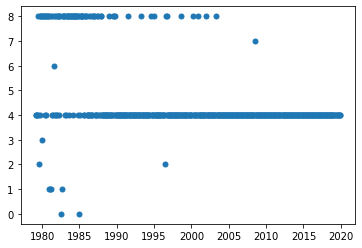

In [101]:
plt.plot(graf.date, graf.Topic_FREX, linewidth=0, markersize=5, marker='o')

Ahora para weights

In [102]:
base['Topic_weight'].unique()

array([8, 9, 0, 1, 7, 4, 3, 2, 6, 5])

In [103]:
graf=base.groupby(['Year', 'Month'], as_index=False)['Topic_weight'].agg(get_mode_list)
graf['date'] = graf.apply(lambda x: datetime.datetime(x['Year'], x['Month'], 1), axis=1)

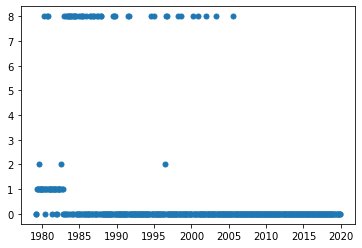

In [104]:
plt.plot(graf.date, graf.Topic_weight, linewidth=0, markersize=5, marker='o')